# Model validation currents

Note: this notebook requires the model output data

In [1]:
import modelskill as ms
import matplotlib.pyplot as plt
import helper as h

In [2]:
obs_fldr = "../observations/" 
mr_fldr = "../output/"
mr_fn = f"{mr_fldr}Area.dfsu"

In [3]:
ulist, vlist = h.get_u_v_point_obs()

In [4]:
mr_u = ms.DfsuModelResult(mr_fn, name="MIKE21", item=1)
mr_v = ms.DfsuModelResult(mr_fn, name="MIKE21", item=2)
mr_u

<DfsuModelResult>: MIKE21
Time: 2014-01-01 00:00:00 - 2023-12-31 23:00:00
Quantity: u velocity component [m/s]

In [ ]:
cc_u = ms.match(obs=ulist, mod=mr_u)
cc_v = ms.match(obs=vlist, mod=mr_v)

<ComparerCollection>
Comparers:
0: Drogden - u-current [m/s]
1: Flinten7 - u-current [m/s]
2: Helsingborg - u-current [m/s]

In [27]:
# Remove bias from comparers
cc2_u = []
cc2_v = []
for i in range(len(cc_u)):
    cc2_u.append(cc_u[i].remove_bias())
    cc2_v.append(cc_v[i].remove_bias())
cc_u = ms.ComparerCollection(cc2_u)
cc_v = ms.ComparerCollection(cc2_v)
cc_u

<ComparerCollection>
Comparers:
0: Drogden - u-current [m/s]
1: Flinten7 - u-current [m/s]
2: Helsingborg - u-current [m/s]

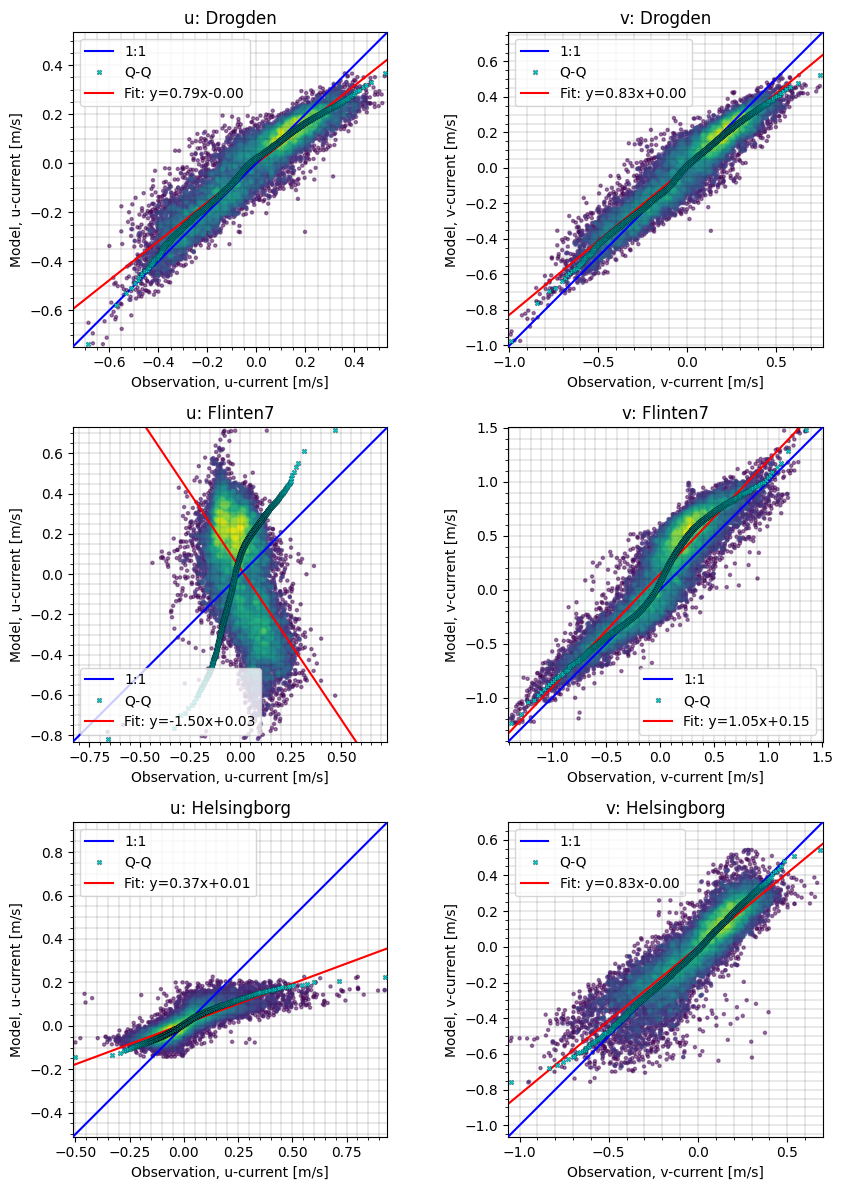

In [23]:
fig,axs = plt.subplots(3,2,figsize=(9,12))
# Scatter plot using just the last year of data
for i in range(len(cc_u)):
    cc_u[i].sel(time=cc_u[i].time[-17520:]).plot.scatter(ax=axs[i,0])
    cc_v[i].sel(time=cc_v[i].time[-17520:]).plot.scatter(ax=axs[i,1])
    axs[i,0].set_title("u: "+cc_u[i].name)
    axs[i,1].set_title("v: "+cc_v[i].name)
plt.tight_layout()
plt.show()

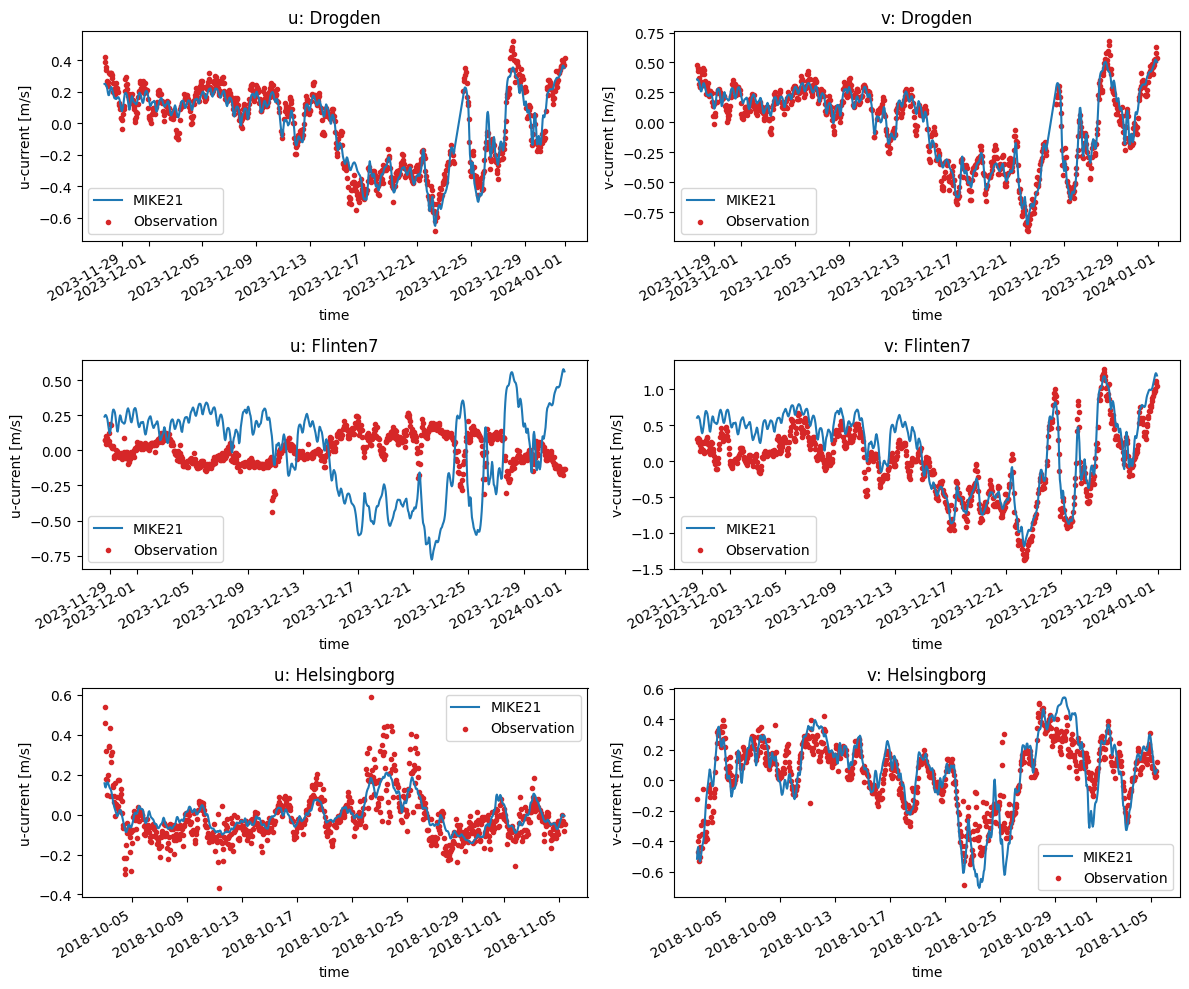

In [26]:
# Look at a timeseries for a qualitative comparison between observations and model
fig,axs = plt.subplots(3,2,figsize=(12,10))
for i in range(len(cc_u)):
    cc_u[i].sel(time=cc_u[i].time[-800:]).plot.timeseries(ax=axs[i,0])
    cc_v[i].sel(time=cc_v[i].time[-800:]).plot.timeseries(ax=axs[i,1])
    axs[i,0].set_title("u: "+cc_u[i].name)
    axs[i,1].set_title("v: "+cc_v[i].name)
plt.tight_layout()
plt.show()
